### 2.3.5 決定木

|決定木|
|:-|

決定木は、クラス分類と回帰タスクに広く用いられているモデルである。決定木では、Yes/Noで答えられる質問で構成された段階的な木構造を学習する。

質問は、「20の質問」ゲームで用いられるような質問である。例えば、４種類の動物、熊、鷹、ペンギン、イルカを区別したいとしよう。目的は、なるべく少ない質問で正しい答えにたどり着くことである。例えば、「その動物に羽毛があるか？」という質問から始めてみよう。この質問によって、可能な動物は２つになる。もし答えがYesだったなら、今度は鷹とペンギンを区別する質問をすればよい。例えば、「その動物は飛べるか？」という質問が考えられる。もし動物に羽毛がないなら、可能性のある動物はイルカか熊ということになるので、この２つを区別する質問をすればよい。例えば、「kの動物にヒレはあるか？」というような。

この一連の質問を決定木として表現することができる。（**図2-22**）

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

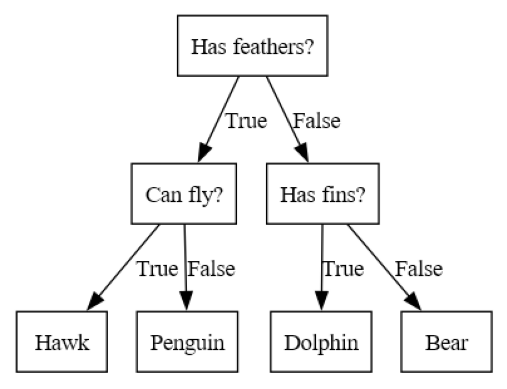

In [2]:
mglearn.plots.plot_animal_tree()

**図2-22 動物を区別する決定木**

この図からわかるように、木のノードは質問を表しているが、答えを表す終端ノード（**葉**（leaf）とも呼ばれる）かである。質問への返答を示すエッジの先が、次にする質問ということになる。

機械学習の用語でいえば、４クラスの動物（鷹、ペンギン、イルカ、熊）を３つの特長量（羽毛はあるか？飛べるか？ヒレはあるか？）で識別するモデルを作ったことになる。このようなモデを手で作るのではなく、データから教師あり学習によってつくることができる。

---

#### 2.3.5.1 決定木の構築

**図2-23**に示す２次元クラス分類データセットを用いて、決定木の構築過程を見てみよう。このデータセットはそれぞれ50データポイントからなる２つの半月形を組み合わせたような形になっている。このデータセットをtwo_moonsと呼ぶ。

決定木における学習は、政界に最も早くたどり着けるような一連のYes/No型の質問の学習を意味する。機械学習では、これらの質問は**テスト**（test）と呼ばれる（モデルの汎化性能を測るためのテストセットと混同しないように）。動物の例では特徴量はYes?No型となっていたが、通常のデータの特徴量は、**図2-23**に示す２次元データセットのように連続値になっている。連続値に対するテストは「特徴量$i$は$a$よりも大きいか？」という形をとる。

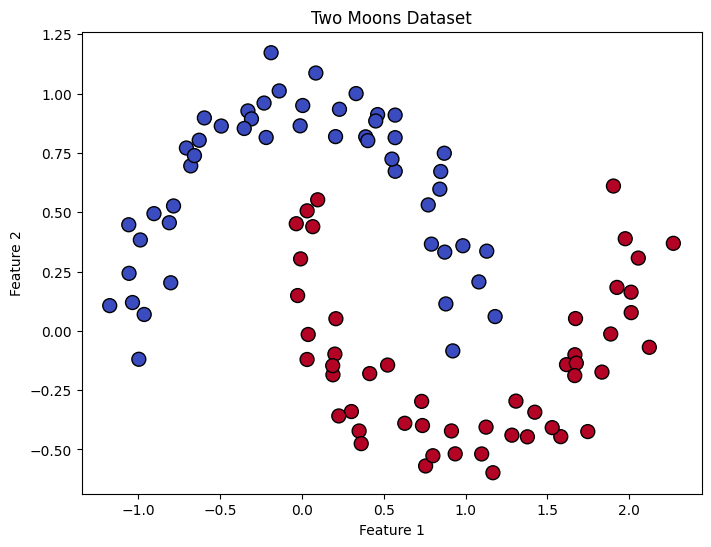

Number of class 0 samples: 50
Number of class 1 samples: 50


In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# データセットを生成
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# データのプロット
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=100, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two Moons Dataset')
plt.show()

# データセットの各クラスの数
print('Number of class 0 samples: {}'.format(np.sum(y == 0)))
print('Number of class 1 samples: {}'.format(np.sum(y == 1)))



**図2-23 決定木の構築に用いるtwo-moonsデータセット**

決定木を構築する際、アルゴリズムはすべての可能なテストの中から、目的変数に対して最も情報量の多いものを選ぶ。**図2-24**に選択された最初のテストを示す。x[1]=0.0596で水平にデータセットを分割することが最も情報の量が多く、クラス０とクラス１をもっともよく分割する。頂点ノード（**ルート**（root）とも呼ばれる）はデータセット全体、つまりクラス０に属する50点とクラス１に属する50点を示す。x[1] <= 0.0596による分割は黒い線で示されている。あるデータポイントがこのテストに対して真の場合、左側のノードに割り当てられる。左側のノードにはクラス０が２点、クラス１が32点ある。テストが偽なら右ノードに割り当てられる。こちらにはクラス０が48点、クラス１にが18点ある。これらのノードは**図2-24**の上の領域と下の領域に対応する。税所の分割はかなりうまく２つのクラスを分割したが、下の領域にもクラス０に属する点があり、上の領域にもクラス１に属する点がある。このプロセスをそれぞれの領域に対して繰り返していくことにより、より正確なモデルを作ることができる。**図2-25**に、x[0]の値に対する最も情報の量がおおい、次の分割を示す。

In [4]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

#! 決定木を描画する関数を定義
def decision_tree(max_depth):
  # データセットを生成
  X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

  # 決定木のモデルを作成 (depthを3に設定)
  clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  clf.fit(X, y)

  # 決定境界を描画するためのグリッドを生成
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                      np.arange(y_min, y_max, 0.02))

  # 決定木による予測
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # プロット
  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)  # 決定境界の描画
  plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.coolwarm, edgecolors='k')  # データポイントのプロット
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Decision Boundary with Decision Tree (max_depth = ' + str(max_depth) + ')')
  plt.show()

  # 決定木のモデルを作成 (depthを3に設定)
  clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  clf.fit(X, y)

  # 決定木をプロット
  plt.figure(figsize=(12, 8))
  tree.plot_tree(clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
  plt.show()



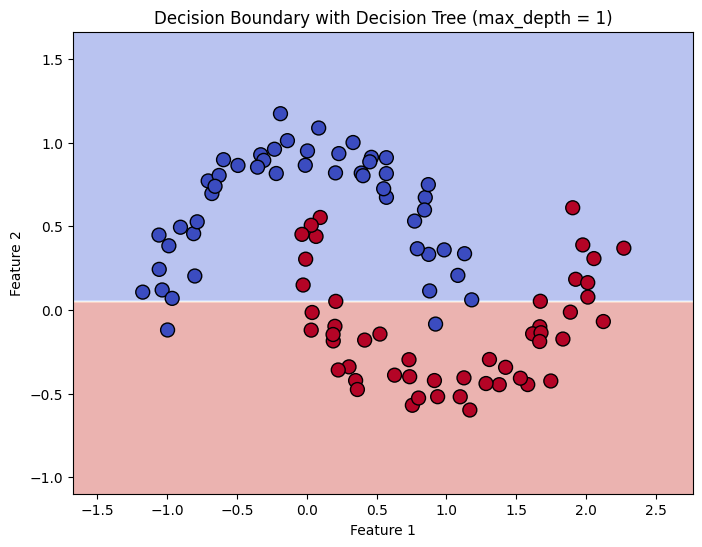

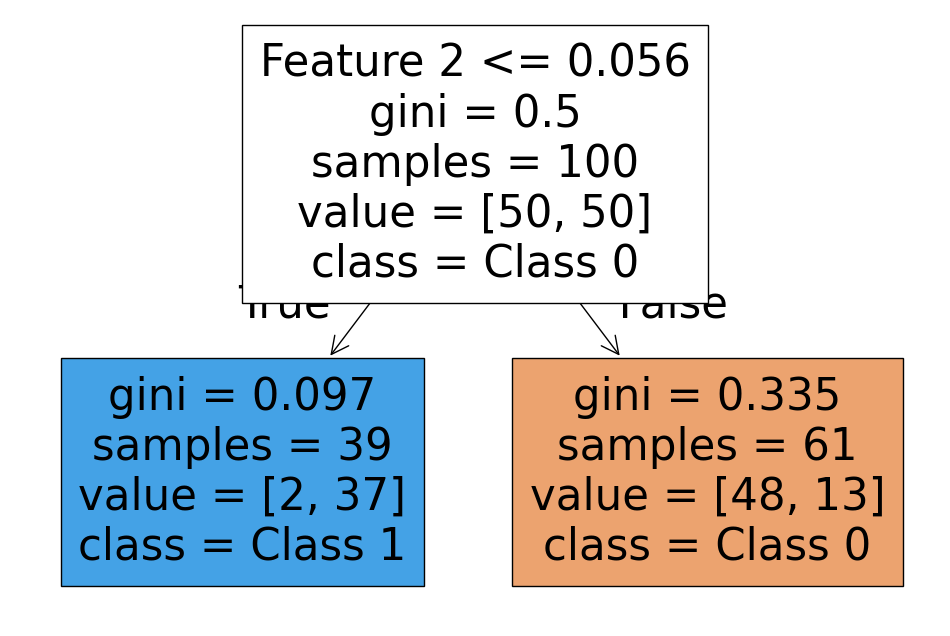

In [5]:
decision_tree(max_depth =1) # 深さ１の決定木描画

**図2-24 深さ１の決定木による決定境界と対応する決定木**

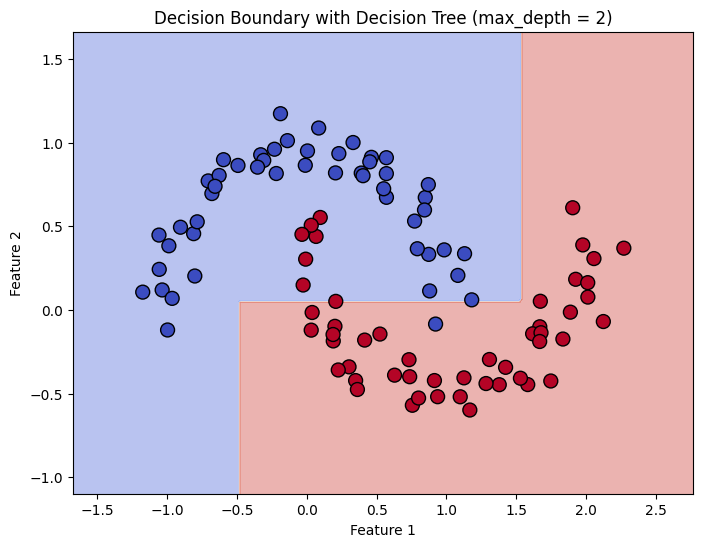

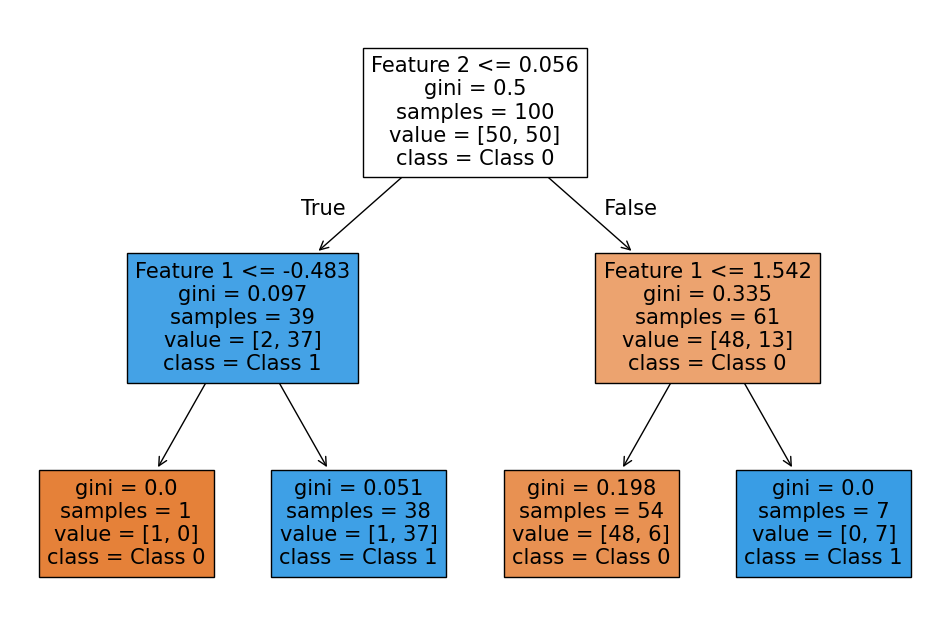

In [6]:
decision_tree(max_depth =2) # 深さ２の決定木描画

**図2-25 深さ２の決定木による決定境界と対応する決定木**

このプロセスを再帰的に繰り返すと、２分岐による決定木が得られる。個々のノードはテストに対応する。個々のテストは対象としている範囲のデータを、いずれかの軸に沿って分割していると考えることもできる。この見方では、アルゴリズムが階層的な分割を行っていることになる。個々のテストは１つの特長量子化考えないので、分割された領域は常に軸に平行な境界を持つ。

データの再起分割は、対象の領域（決定木の葉）に１つの対象値（１クラス、もしくは１つの回帰値）しか含まれなくなるまで繰り返される。１つの対象値のデータポイントしか含まないような決定木の葉を**純水**（pure）と呼ぶ。このデータセットに対する最終的な分割を**図2-26**に示す。

新しいデータポイントに対する予測は、そのデータポイントが属する特徴量空間上の分割領域によって行われる。その領域に含まれるデータポイントの多数が持つターゲット値が用いられる。（純粋な葉の倍にはその領域に対応するターゲット値は１つしかない）。データポイントが属する領域を探すには決定木を上から下に向かって、テストの真偽で左右を決めながらたどればよい。

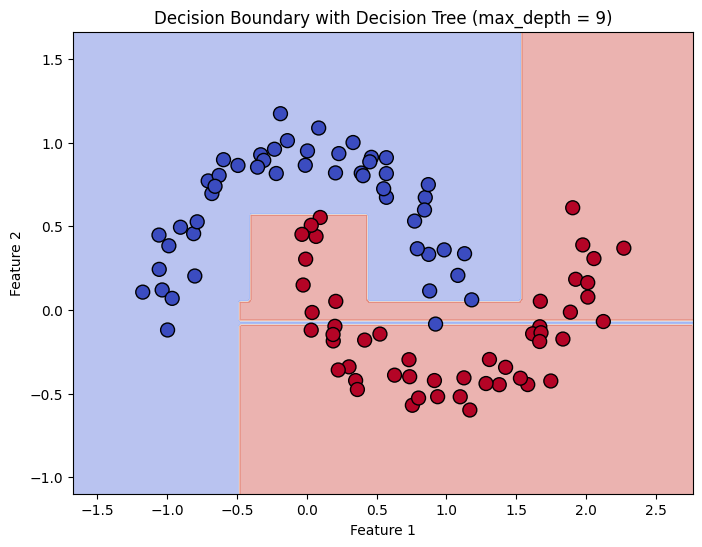

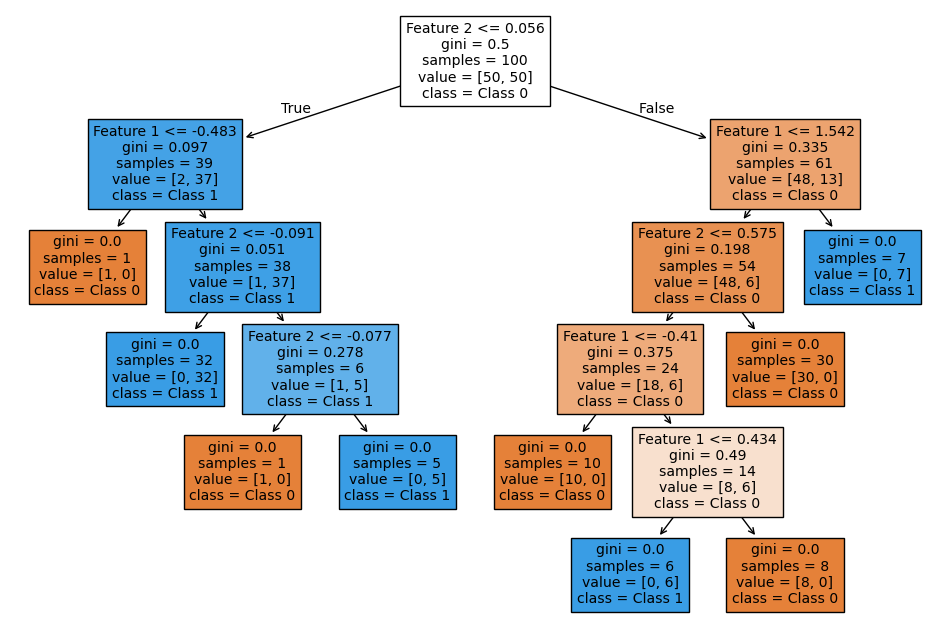

In [7]:
decision_tree(max_depth =9) # 深さ９の決定木描画

**図2-26 深さ９の決定木による決定境界と対応する決定木**

決定木にはまったく同じようにして回帰タスクに利用することもできる。予測を行うには、テストに基づいてノードをたどり、そのデータポイントが属する葉を求める。データポイントに対する出力は、その葉の中にある訓練データっぽ院との平均ターゲット値になる。

#### 2.3.5.2 決定木の複雑さの制御

一般に、上で述べたような方法で、葉が純粋になるまで分割を続けると、モデルは複雑になりすぎ、訓練データに対して大幅に過剰適合してしまう。葉が純粋になっているということは、訓練セットに対しては100%の精度になっているということである。訓練セットのデータポイントは、俗数はの中で常に正しい多数派クラスになっているからだ。**図2-26**を見れば過剰適合が起きていることがわかる。クラス０の領域の中にクラス１に属する領域がある。これは多くの人が期待する決定境界とは異なるだろう。この決定境界は、そのクラスに属する他の点からかけ離れた場所に１つだけある外れ値を重視しすぎている。

過剰適合を防ぐには２つの戦略がある。構築過程で木の生成を速めに止める**事前枝刈り**（pre-pruning）と、一度木を構築してから、情報の少ないノードを削除する**事後枝刈り**（post-pruning）（ただの**枝刈り**（pruning）とも呼ばれる）である。事前枝刈りの方法としては、木の深さを制限する方法や、葉の最大値を制限する方法、分割する際にその中に含まれている点の最小値を決めておく方法がある。

scikit-learnでは、決定木はDecisionTreeRegressorクラスとDecisionTreeClassifierクラスに実装されている。scikit-learnには事前枝刈りしか実装されていない。事前枝刈りの効果を、cancerデータセットを用いてより詳しく見てみよう。いつものように、データセットを読み込んで訓練セットとデータセットに分割する。次にデフォルトの設定で完全な木を構築する（葉が純粋になるまで木を育てる）。ここでは、内部でタイブレークに使われるrandom_stateを固定している。

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


予想通り、訓練セットの精度は100%である。これは葉が純粋で、訓練データのすべてのラベルを十分なほど木が育っているからだ。テストセットに対する精度は、以前見た線形モデルより少し悪く95%程度になっている。

決定木の深さに制約を与えないと、決定木はいくらでも深く、複雑になる。したがって、枝刈りされていない木は過剰適合になりやすく、新しいデータに対する汎化性能が低い傾向になる。ここで、事前枝刈りを適用して、木が完全に訓練データに適合する前に木の成長を止めてみよう。１つの方法は、木がある深さに達したらそこで止めるという方法だ。ここではmax_depth=4としている。こうすると質問の列は４つまで、ということになる。（**図2-24**、**図2-26**）。木の深さを制限することで過剰適合が抑制される。これによって、訓練制度は下がるが、テストセットに対する精度は向上する。

In [9]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### 2.3.5.3 決定木の解析

treeモジュールのexport_graphviz関数を使って木を可視化することができる。この関数は、グラフを格納するテキストファイル形式である。.dotファイル形式でファイルを書き出す。ノードにそのノードでの多数派のクラスに応じた色を付けるようにオプションで指定し、木に適切なラベルがつくようにクラスの名前と特徴量の名前を渡している。

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

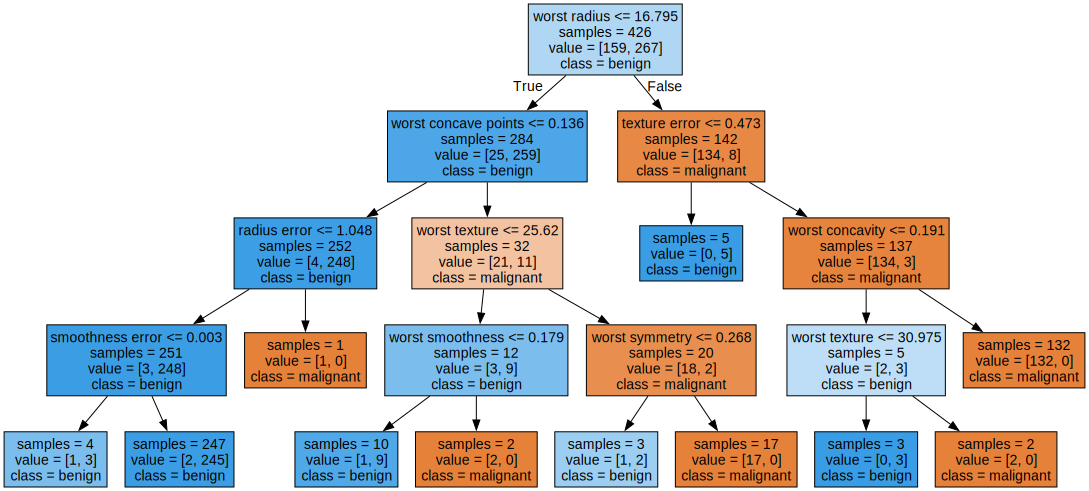

In [11]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

決定木を可視化したものを見ると、アルゴリズムの予測過程をより深く知ることができる。専門家以外にも簡単に説明できる機械学習アルゴリズムの良い例となっている。しかし、ここで見ている深さ４の決定木でも少し圧倒される。もっと深い決定木（深さ10になることも珍しくない）はさらに理解しにくい。決定木を検証するよい方法の１つは、大多数のデータがたどるパスを見つけることである。**図2-27**の**samples**は、そのノードにあるサンプルの個数を示し、**value**はクラスごとのサンプルの個数を示している。ルートから右の枝をたどると、worst radius > 16.795によって作られるノードには、８の良性（benign）と134の悪性（malignant）しかない。こちら側の決定木の残りはより細かい識別を行って、良性の８つのサンプルを分離するために費やされている。最初の分岐で右に行った142のサンプルのうち、そのほとんど（132）が一番右の葉に行きつく。

ルートから左に行った場合、つまりworst radius <= 16.795の場合になるのは、悪性（malignant）25点、良性（benign）259点である。ほとんどすべての良性のサンプル点は左から２番目の葉に行き着き、その他の葉にはごくわずかのサンプル点しかない。

#### 2.3.5.4 決定木の特徴量の重要性

決定木全体を見るのは大変なので、決定木から導出できる。決定木の挙動を要約する特性値を見てみよう。要約に最もよく使われるのは、**特徴量の重要度**（feature importance）と呼ばれる、決定木が行う判断にとって、個々の特徴量がどの程度重要かをいｓ雌割合である。それぞれの特徴量に対する０と１の間の数で、０は「全く使われていない」、１は「完全にターゲットを予想できる」を意味する。特徴量の重要度の和は常に１になる。

In [12]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


線形モデルで係数を見た時と同じような方法で、特徴量の重要度を可視化することができる（**図2-28**）。

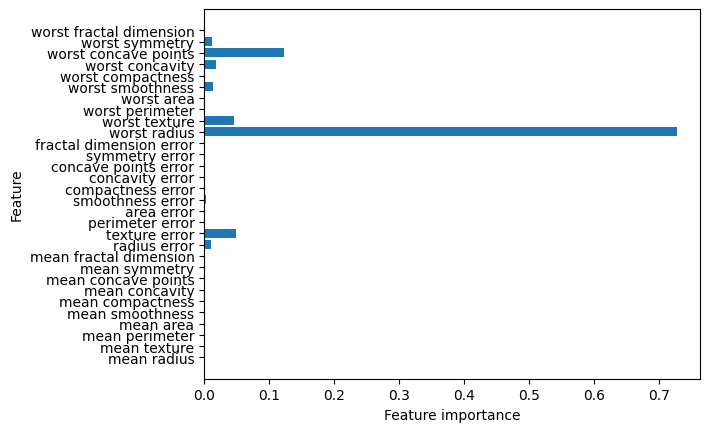

In [13]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

**図 2-28 cancerデータセットから学習した決定木から計算した特徴量の重要度**

最初の分岐に用いた特徴量（「worst radius」）が群を抜いて重要な特徴量だということがわかる。これは、決定木を解析した際の、最初のレベルで２つのクラスがかなりきれいに分離できている、という観察悔過kと一致する。

しかし、ある特徴量の重要度（feature_importance_）の値が低いからと言って、その特徴量の持つ情報が少ないとは限らない。単にその決定木で採用されなかった、というだけだ。別の特徴量に同じ情報がエンコードされていることはよくあるので、たまたま採用されないことがあるのだ。

線形モデルの係数と異なり、特徴量の重要度は常に正であり、特徴量がどのクラスを示しているかをエンコードしているわけではない。特徴量の重要度は、サンプルが良性か悪性かを判断する上で、「worst radius」が重要だということを教えてくれるが、この値が大きいと良性になるのか悪性になるのかを教えてくれるわけではない。実際、次の例で示すように、特徴量とクラスの関係はそれほど単純ではない（**図2-29**、**図2-30**）。

Feature importances: [0. 1.]


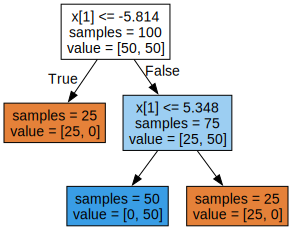

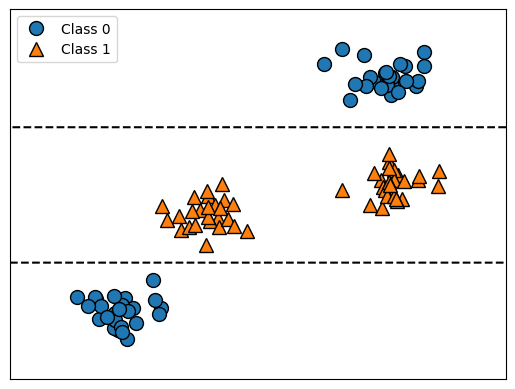

In [14]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

**図2-30 図2-29に対する決定木**  
**図2-29 y軸に対してクラスラベルと単調な関係を持たない２次元データセットと決定木による決定境界**

２つの特長量を持つ２つのクラスからなるデータセットを示している。ここではすべての情報はX[1]にありX[2]は使われていない。しかし、X[1]と出力クラスの関係は単調ではない。つまり、「X[1]の値が大きいとクラス０になり、小さいとクラス１になる（もしくはその逆）」ようなことは言えないわけだ。

ここでは、クラス分類に用いる決定木についてのみ議論してきたが、ここで述べたことは、DecisionTreeRegressorに実装されている決定木による回帰を用いる場合にも同様に当てはまる。回帰決定木の使い方も解析も、クラス分類決定木のそれとほとんど同じだ。ただし、１つだけ決定木によるモデルを回帰に使う際に注意しなければならないことがある。DecisionTreeRegressorは（そしてすべての決定木による回帰モデルは）、**外挿**（extrapolate）ができない。つまり訓練データのレンジの外側に対しては予測できないのだ。

計算機のメモリ（RAM）価格の履歴データセットを使って、詳しく見てみよう。**図2-31**にこのデータセットを示す。$x$軸は年を、$y$軸はメガバイトあたりのRAM価格を示している。

Text(0, 0.5, 'Price in $/Mbyte')

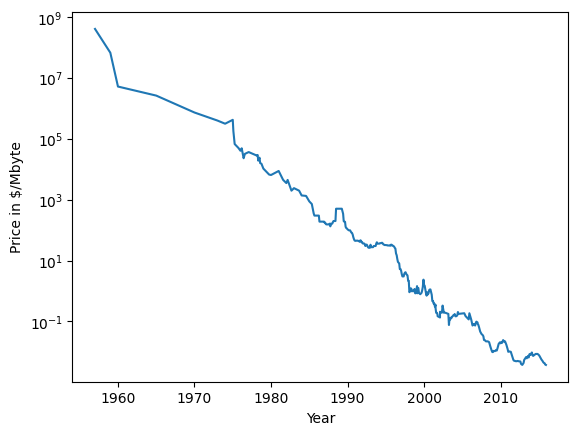

In [15]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

**図2-31 メモリ（RAM）価格の歴史的推移、対数スケールでプロットされている。**

$y$軸が対数スケールになっていることに注意しよう。対数でプロットすると、この関係は多少のデコボコはあるがおおよそ直線になり、予測がしやすくなる。

2000年までのデータを使って、それ以降を予測してみよう。２つの簡単なモデル、DecisionTreeRegressorとLinearRegressionを比較してみよう。価格は対数スケールに直して、関係が比較的線形になるようにしている。これはDecisionTreeRegressorにはあまり関係ないが、LinearRegressionでは非常に重要になる（これについては「**４章 データの表現と特徴量エンジニアリング**」で議論する）。これらのモデルを訓練して予測してみる。結果の値を見るには対数変換をキャンセルするために、指数変換する必要がある。ここでは可視化の都合で、すべてのデータセットに対して予測を行っているが、定量的評価にはテストデータセットだけを考えればよい。

In [16]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 例としてのデータフレームの作成
# 実際のデータを使用する場合は、適切なデータを読み込んでください
# ram_prices = pd.DataFrame({
#     'date': np.arange(1950, 2021),
#     'price': np.exp(np.random.randn(71))  # ランダムな価格データ
# })

# 過去のデータを用いて2000年以降の価格を予想する
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 日付に基づいて価格を予測
X_train = data_train.date.values[:, np.newaxis]
# データとターゲットの関係を単純にするために対数変換
y_train = np.log(data_train.price.values)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 全てのデータに対して予測
X_all = ram_prices.date.values[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 対数変換をキャンセルするために逆変換
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

**図2-32**は、決定木モデルと線形回帰モデルの予測結果と、実際のデータを比較している。

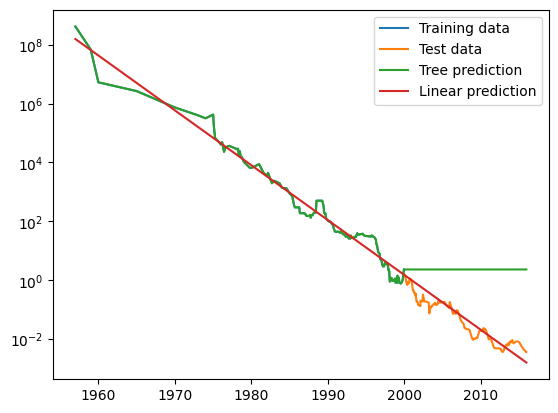

In [17]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

****図2-32** RAM価格データに対する線形回帰モデルによる予測と決定木モデルによる予測の比較**

２つのモデルの違いには驚くべきものがある。線形モデルは、我々が知る通りデータを強く選で近似する。この直線は、訓練データとテストデータの双方において細かい変異を取りこぼしているものの、テストデータ（2000年以降のデータ）に対してかなり良い予測を与えている。一方、決定木のほうは、訓練データに対しては完全なう予測を行う。複雑さを制約していないので、データセットを完全に覚えているからだ。しかし、モデルがデータを持っていない領域になると、決定木は知っている最後の点を返してくるだけになる。決定木は、訓練データにない領域に関しては、「新しい」答えを生成することができないのだ。この欠点は、決定木に基づくすべてのモデルに共通する。

#### 2.3.5.5 長所、短所、パラメータ

これまでに見た通り、決定木におけるモデルの複雑さを制御するパラメータは、決定木が完全に成長する前に構築を停止する事前枝刈りパラメータだ。多くの場合、過剰適合を防ぐには事前枝刈り戦略を指定するmax_depth、max_laef_nodes、min_samples_leafのどれか1つを選ぶだけで十分だ。

決定木にはこれまで見てきたアルゴリズムと比較して、２つの長所がある。結果のモデルが容易に可視化可能で、（少なくとも小さい決定木であれば）専門家でなくても理解可能であること、データのスケジュールに対して完全に不変であることである。個々の特徴量は独立に処理され、データの分割はスケールに依存しないので、決定木においては正規化や標準化は必要ないのだ。決定木は、特徴量ごとにスケールが大きく異なるような場合でも２値特徴量と連続値特徴量が混ざっているような場合でも、問題なく機能する。

決定木の最大の問題点は、事前枝刈りを行ったとしても、過剰適合しやすく、汎化性能が低い傾向があることだ。このため、ほとんどのアプリケーションにおいては、決定木を単体で使うのではなく、次に見るアンサンブル法が用いられる。